<a href="https://colab.research.google.com/github/entc-17-fyp-20/CM_Clustering_Method/blob/main/DBSCAN_Clustering_WindForce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intro

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import seed
import plotly.express as px

In [28]:
#@title Select Dataset Old { display-mode: "form" }
turbine = 'V08' #@param ["V08", "V13"]
month = 'June' #@param ["June1", "June", "July1", "July"]
path = 'drive/MyDrive/DatasetsWind/' + turbine + month + '.csv'
df = pd.read_csv(path)
df.set_index(df['Date & Time'], inplace=True)

In [35]:
df1 = df[['Wind Speed m/s', 'Active Power kW', 'Gearbox & Bearing temp', 'Hydralic Oil Temperature', 'Nacelle Temperature']]

In [36]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=1.1, min_samples=15).fit(df1)
clustering_frame = pd.DataFrame(clustering.labels_.tolist(), columns=['label'])
clustering_frame.set_index(df['Date & Time'], inplace=True)
df_new = pd.concat([df1, clustering_frame], axis=1)
df_new["label"] = df_new['label'].astype(int)
df_new['label'] = df_new['label'] + 1
df_new["label"] = df_new['label'].astype(str)
df_new.reset_index(inplace=True)

# 1.1, 15

In [37]:
#@title Select Dataset { display-mode: "form" }
columny = "Active Power kW" #@param ['Wind Speed m/s','Ambient Temperature','Date & Time', "Gearbox Bearing Temperature","Gearbox oil Temperature","Generator Winding Temperature Phase R","Generator Winding Temperature Phase S","Generator Winding Temperature Phase T","Main bearing Temperature","Generator Bearing Temperature DE","Generator Bearing Temperature NDE", 'Hydraulic unit Pressure in bar', 'Nacelle Temperature','Active Power kW', 'Wind Speed m/s', 'Ambient Temperature','Hydralic Oil Temperature', 'Generator RPM', 'voltage','Gearbox & Bearing temp', 'Hour']
columnx = "Wind Speed m/s" #@param ['Wind Speed m/s','Ambient Temperature','Date & Time', "Gearbox Bearing Temperature","Gearbox oil Temperature","Generator Winding Temperature Phase R","Generator Winding Temperature Phase S","Generator Winding Temperature Phase T","Main bearing Temperature","Generator Bearing Temperature DE","Generator Bearing Temperature NDE", 'Hydraulic unit Pressure in bar', 'Nacelle Temperature','Active Power kW', 'Wind Speed m/s', 'Ambient Temperature','Hydralic Oil Temperature', 'Generator RPM', 'voltage','Gearbox & Bearing temp', 'Hour']


fig = px.scatter(df_new, x=columnx, y=columny, color="label", hover_data=['Date & Time']) #, 'Generator_RPM' , 'Nacelle Temperature', 'Gearbox & Bearing temp', 'Hydralic Oil Temperature'
fig.update_xaxes(ticks="inside")
fig.update_yaxes(ticks="inside", col=1)

fig.show()

In [38]:
columny = "Active Power kW" #@param ['Wind Speed m/s','Ambient Temperature','Date & Time', "Gearbox Bearing Temperature","Gearbox oil Temperature","Generator Winding Temperature Phase R","Generator Winding Temperature Phase S","Generator Winding Temperature Phase T","Main bearing Temperature","Generator Bearing Temperature DE","Generator Bearing Temperature NDE", 'Hydraulic unit Pressure in bar', 'Nacelle Temperature','Active Power kW', 'Wind Speed m/s', 'Ambient Temperature','Hydralic Oil Temperature', 'Generator RPM', 'voltage','Gearbox & Bearing temp', 'Hour']

fig = px.histogram(df_new , x=columny, facet_col="label")
fig.show()
#, histfunc='sum', facet_col='smoker', y="label"

In [ ]:
df_new['label'].describe()

In [40]:
#@title One variable with time { display-mode: "form" }
import plotly.graph_objects as go
df_new["label"] = df_new['label'].astype(int)

column_name = "Gearbox & Bearing temp" #@param ['Wind Speed m/s','Ambient Temperature','Date & Time', "Gearbox Bearing Temperature","Gearbox oil Temperature","Generator Winding Temperature Phase R","Generator Winding Temperature Phase S","Generator Winding Temperature Phase T","Main bearing Temperature","Generator Bearing Temperature DE","Generator Bearing Temperature NDE", 'Hydraulic unit Pressure in bar', 'Nacelle Temperature','Active Power kW', 'Wind Speed m/s', 'Ambient Temperature','Hydralic Oil Temperature', 'Generator RPM', 'voltage','Gearbox & Bearing temp', 'Hour']

fig = go.Figure(data=go.Scatter(x=df_new['Date & Time'], y=df_new[column_name], mode='markers', marker_color=df_new['label']))

# Set title
fig.update_layout(title_text= column_name)

#fig = px.line(df1, x="Date_Time" , y=column_name) 
fig.show()

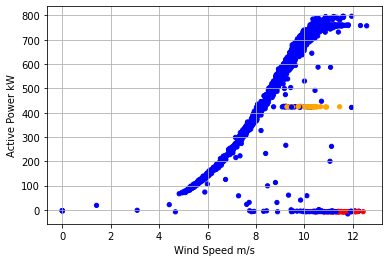

In [50]:
import numpy as np
import matplotlib.pyplot as plt

colors  = {0:'blue', 1:'red', 2:'orange'}
plt.grid()
plt.scatter(x=df_new['Wind Speed m/s'], y=df_new["Active Power kW"], c=df_new['label'].apply(lambda x: colors[x]), s=18)
plt.xlabel('Wind Speed m/s')
plt.ylabel('Active Power kW')
plt.show()